In [20]:
import os
import numpy as np 
import pandas as pd 
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk, re, json, string
from nltk.util import ngrams
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet 
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances
import numpy as np  
import pandas as pd
import string
from nltk.corpus import stopwords

In [37]:
novel_data = []

for i in os.listdir('Dataset/'):
    with open('Dataset/'+i, encoding="utf8", errors="ignore") as file:
        content = file.read().rstrip().replace("\n", "")
        
        novel_data.append(content)

print(len(novel_data))

41


In [39]:
# Define the function

def nltk_pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return(wordnet.ADJ)
    elif nltk_tag.startswith('V'):
        return(wordnet.VERB)
    elif nltk_tag.startswith('N'):
        return(wordnet.NOUN)
    elif nltk_tag.startswith('R'):
        return(wordnet.ADV)
    else:          
        return None

def tokenize(doc):
    
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    
    word_token = nltk.word_tokenize(doc)

    unigram = list(ngrams(word_token, 1))
    unigram = [i[0] for i in unigram]

    unigram = [i for i in unigram if i not in stop_words]
    unigram = [i for i in unigram if i not in string.punctuation]
    unigram = [i for i in unigram if i!= ('—' or '``' or "''")]
    unigram = [i.lower() for i in unigram]
    
    pos_tag = nltk.pos_tag(unigram)

    clean_unigram = []
    
    for i in pos_tag:
        try:
            clean_unigram.append(lemmatizer.lemmatize(i[0], nltk_pos_tagger(i[1])))
        except:
            clean_unigram.append(i[0])
       
    return(clean_unigram)
     

In [23]:
def compute_tfidf(docs):
    
    smoothed_tf_idf = None
    
    def get_doc_tokens(i):
            tokens = tokenize(i)
            token_count=nltk.FreqDist(tokens)
            return token_count
        
    docs_tokens={idx:get_doc_tokens(doc) for idx,doc in enumerate(docs)}
   
    # put words as columns
    dtm=pd.DataFrame.from_dict(docs_tokens, orient="index")
    dtm = dtm.sort_index(axis = 0)
    dtm=dtm.fillna(0)
    tf=dtm.values
    
    # sum of each rows
    doc_len=tf.sum(axis=1)
    tf=np.divide(tf, doc_len[:,None])

    # find freq of each term in all docs
    df=np.where(tf>0,1,0)
       
    idf=np.log(np.divide(len(docs), np.sum(df, axis=0)))+1
  
    smoothed_idf=np.log(np.divide(len(docs)+1, np.sum(df, axis=0)+1)+1)
   
    s = tf*idf
    tf_idf=normalize(tf*idf)   
    smoothed_tf_idf = normalize(tf*smoothed_idf)
        
    return smoothed_tf_idf

In [42]:
tf_idf_novel = compute_tfidf(novel_data)
tf_idf_novel.shape

(41, 374009)

In [44]:
df = pd.DataFrame(tf_idf_novel)
df

,0,1,2,3,4,5,6,7,8,9,...,373999,374000,374001,374002,374003,374004,374005,374006,374007,374008
0,0.067812,0.036025,0.012715,0.005828,0.020132,0.055499,0.008404,0.002382,0.001867,0.015364,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.083079,0.358278,0.124619,0.057117,0.031155,0.000000,0.000000,0.000000,0.000000,0.098656,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.075235,0.027358,0.009656,0.004426,0.024944,0.000620,0.000000,0.000000,0.000000,0.015691,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.073786,0.011464,0.003875,0.001776,0.016792,0.000249,0.000427,0.020328,0.000569,0.009687,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.033723,0.009002,0.003225,0.001075,0.008196,0.000414,0.000000,0.000201,0.000000,0.014645,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.035430,0.028014,0.009887,0.004532,0.005356,0.000000,0.000000,0.000000,0.000000,0.020187,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.036726,0.021164,0.007470,0.003424,0.007470,0.001438,0.000823,0.000000,0.000000,0.024899,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.040618,0.006739,0.002186,0.001002,0.013661,0.000140,0.000000,0.000000,0.000000,0.010200,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.076784,0.011037,0.003784,0.001734,0.008041,0.000000,0.000000,0.000000,0.000000,0.016713,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.079476,0.024858,0.008403,0.003851,0.011904,0.000000,0.000000,0.000000,0.000000,0.011204,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [61]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [46]:
model = KMeans(init="random", n_clusters=5, n_init=10, max_iter=300, random_state=42).fit(df)

In [47]:
model.inertia_

15.12656915353929

In [48]:
model.cluster_centers_

array([[1.91681568e-04, 9.03641677e-04, 3.14905433e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.94697977e-02, 1.63853353e-02, 5.52608895e-03, ...,
        1.11585483e-05, 1.11585483e-05, 1.11585483e-05],
       [1.13118893e-01, 1.42189182e-02, 4.79819364e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.43128034e-01, 4.93492629e-02, 1.73069519e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.25398338e-02, 5.79758902e-02, 2.01869687e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [49]:
model.n_iter_

3

In [59]:
kmeans_kwargs = {
   ...:     "init": "random",
   ...:     "n_init": 10,
   ...:     "max_iter": 300,
   ...:     "random_state": 42,
   ...: }
   ...:
   ...: # A list holds the SSE values for each k
   ...: sse = []
   ...: for k in range(1, 15):
   ...:     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
   ...:     kmeans.fit(df)
   ...:     sse.append(kmeans.inertia_)

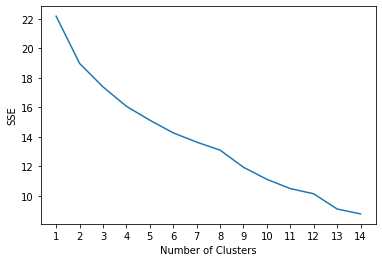

In [60]:
plt.plot(range(1, 15), sse)
plt.xticks(range(1, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [64]:
silhouette_coefficients = []
   ...:
   ...: # Notice you start at 2 clusters for silhouette coefficient
   ...: for k in range(2, 11):
   ...:     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
   ...:     kmeans.fit(df)
   ...:     score = silhouette_score(df, kmeans.labels_)
   ...:     silhouette_coefficients.append(score)

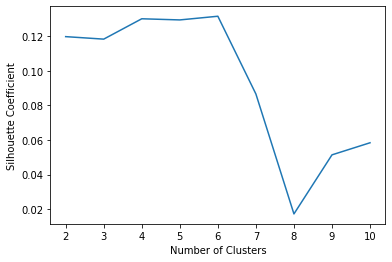

In [65]:
 ...: plt.plot(range(2, 11), silhouette_coefficients)
   ...: plt.xticks(range(2, 11))
   ...: plt.xlabel("Number of Clusters")
   ...: plt.ylabel("Silhouette Coefficient")
   ...: plt.show()